<h1 style='color:blue'>Project Name - Diamond Price Prediction</h1>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error
import joblib
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from statistics import mean

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3 style='color:purple'>(1)Problem Statement </h3>

1.   What are the most popular daimonds for daimond price prediction? How do prices and availability vary by carat?

2.   How has the diamond price prediction in India changed over time? ?Have there been any significant trends in total quantity of diamond cutting?

3.   What effect has been seen on average carat of each clarity?

4.   Find the distribution of each daimond color.

5.    Are there any factors that seem to be correlated with the prices of price prediction in diamonds?

6. What effect is the increase and decre in depth having on the price?




<h3 style='color:purple'>(2)Data Gathering </h3>

In [107]:
df=pd.read_csv('/content/drive/MyDrive/train.csv')
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


<h3 style='color:purple'>(3)Data Analysis </h3>

In [108]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [109]:
df.shape

(193573, 11)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [112]:
df=df.drop_duplicates()
df.count()

,0
id,193573
carat,193573
cut,193573
color,193573
clarity,193573
depth,193573
table,193573
x,193573
y,193573
z,193573


In [113]:
df.isnull().sum()

,0
id,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0


In [114]:
df.cut

,cut
0,Premium
1,Very Good
2,Ideal
3,Ideal
4,Premium
...,...
193568,Ideal
193569,Premium
193570,Very Good
193571,Very Good


In [115]:
df.carat.nunique()

248

<h3 style='color:purple'>(4)Exploratory Data Analysis </h3>

   **(1) Distribution Of Diamond Price Range Using Histogram**

Text(0.5, 1.0, 'Distribution Of Diamond Price')

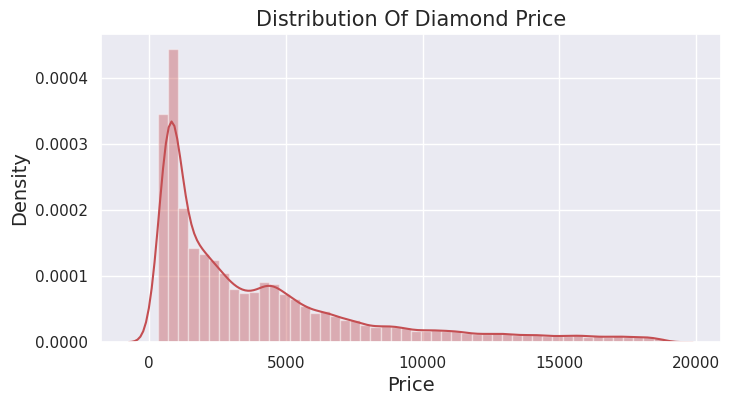

In [117]:
plt.figure(figsize=(8,4))
sns.set_theme(style='darkgrid')
sns.distplot(df['price'],color='r')
plt.xlabel('Price',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Distribution Of Diamond Price',fontsize=15)

 **(2) Total quantity of diamond cutting count in  using Count plot**

In [118]:
TopCut=df['cut'].value_counts().reset_index()
TopCut.columns=['Cutting_Type','Total_Cutting']
TopCut

,Cutting_Type,Total_Cutting
0,Ideal,92454
1,Premium,49910
2,Very Good,37566
3,Good,11622
4,Fair,2021


Text(0.5, 1.0, 'Total quantity of diamond cutting')

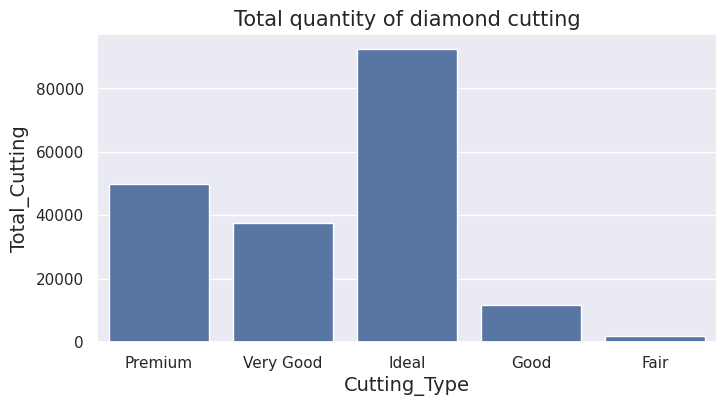

In [119]:
plt.figure(figsize=(8,4))
sns.countplot(x='cut',data=df)
plt.xlabel('Cutting_Type',fontsize=14)
plt.ylabel('Total_Cutting',fontsize=14)
plt.title('Total quantity of diamond cutting',fontsize=15)

**3.)Average carat of each clarity uing point plot**

In [120]:
grouped=df.groupby("clarity").agg({'carat':'mean'}).reset_index().rename(columns={'carat':'avg_carat'}).round(2)
grouped

,clarity,avg_carat
0,I1,1.09
1,IF,0.45
2,SI1,0.86
3,SI2,1.07
4,VS1,0.71
5,VS2,0.77
6,VVS1,0.46
7,VVS2,0.57


Text(0.5, 1.0, 'Average carat of each clarity ')

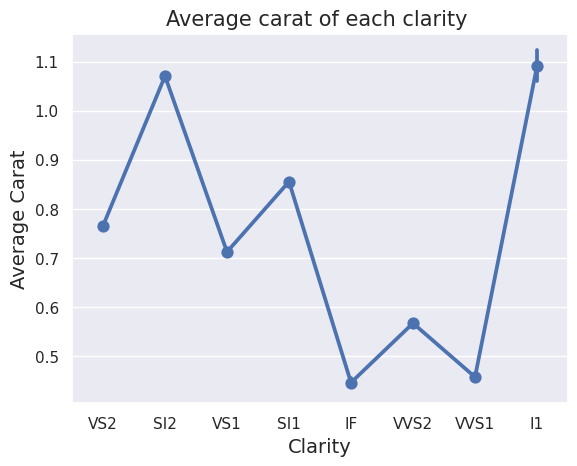

In [122]:
sns.pointplot(x='clarity',y='carat',data=df,estimator=np.mean)
plt.xlabel('Clarity',fontsize=14)
plt.ylabel('Average Carat',fontsize=14)
plt.title('Average carat of each clarity ',fontsize=15)

**(4) Price Distribution Of each diamond color using Violin Plot**

Text(0.5, 1.0, 'Violin Plot For Color Vs Price')

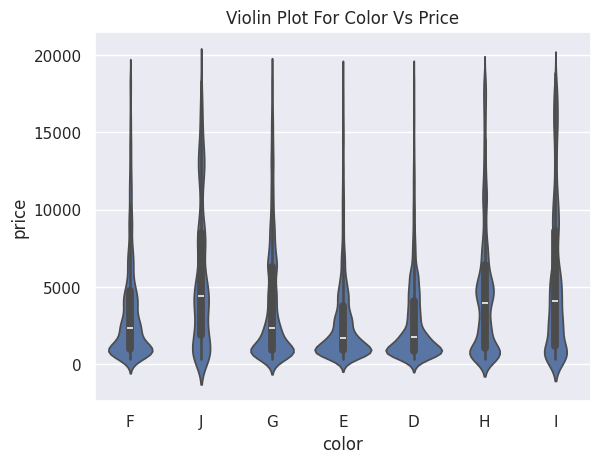

In [123]:
ax=sns.violinplot(x='color',y='price',data=df)
plt.title("Violin Plot For Color Vs Price")

**5.) Price in depth using Scatter and Bar chart**

In [124]:
px.scatter(df.sample(n=1000,replace=False,random_state=123).sort_index(),x='depth',color='depth',y='price')

---
**(6) Correlation Heatmap Visualization**

In [125]:
print(df.dtypes)

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [126]:
import copy

In [127]:
df1=copy.deepcopy(df)

In [128]:
df1.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [130]:
df1=df1.drop(['cut','color','clarity'],axis=1)

In [131]:
df1.head(2)

,id,carat,depth,table,x,y,z,price
0,0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,62.0,58.0,8.06,8.12,5.05,13387


In [132]:
corr=df1.corr()
corr

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.000771,0.002647,0.002448,-0.000476,-0.000448,0.000037,-0.001392
carat,-0.000771,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.002647,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.002448,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,-0.000476,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,-0.000448,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.000037,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,-0.001392,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


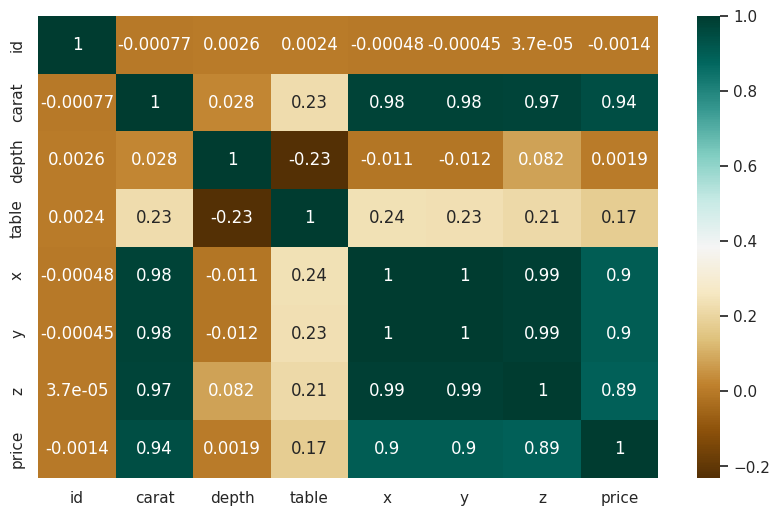

In [133]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,cmap='BrBG',annot=True)
plt.show()

---
**(7) Pair Plot Visualization**

<Figure size 1000x600 with 0 Axes>

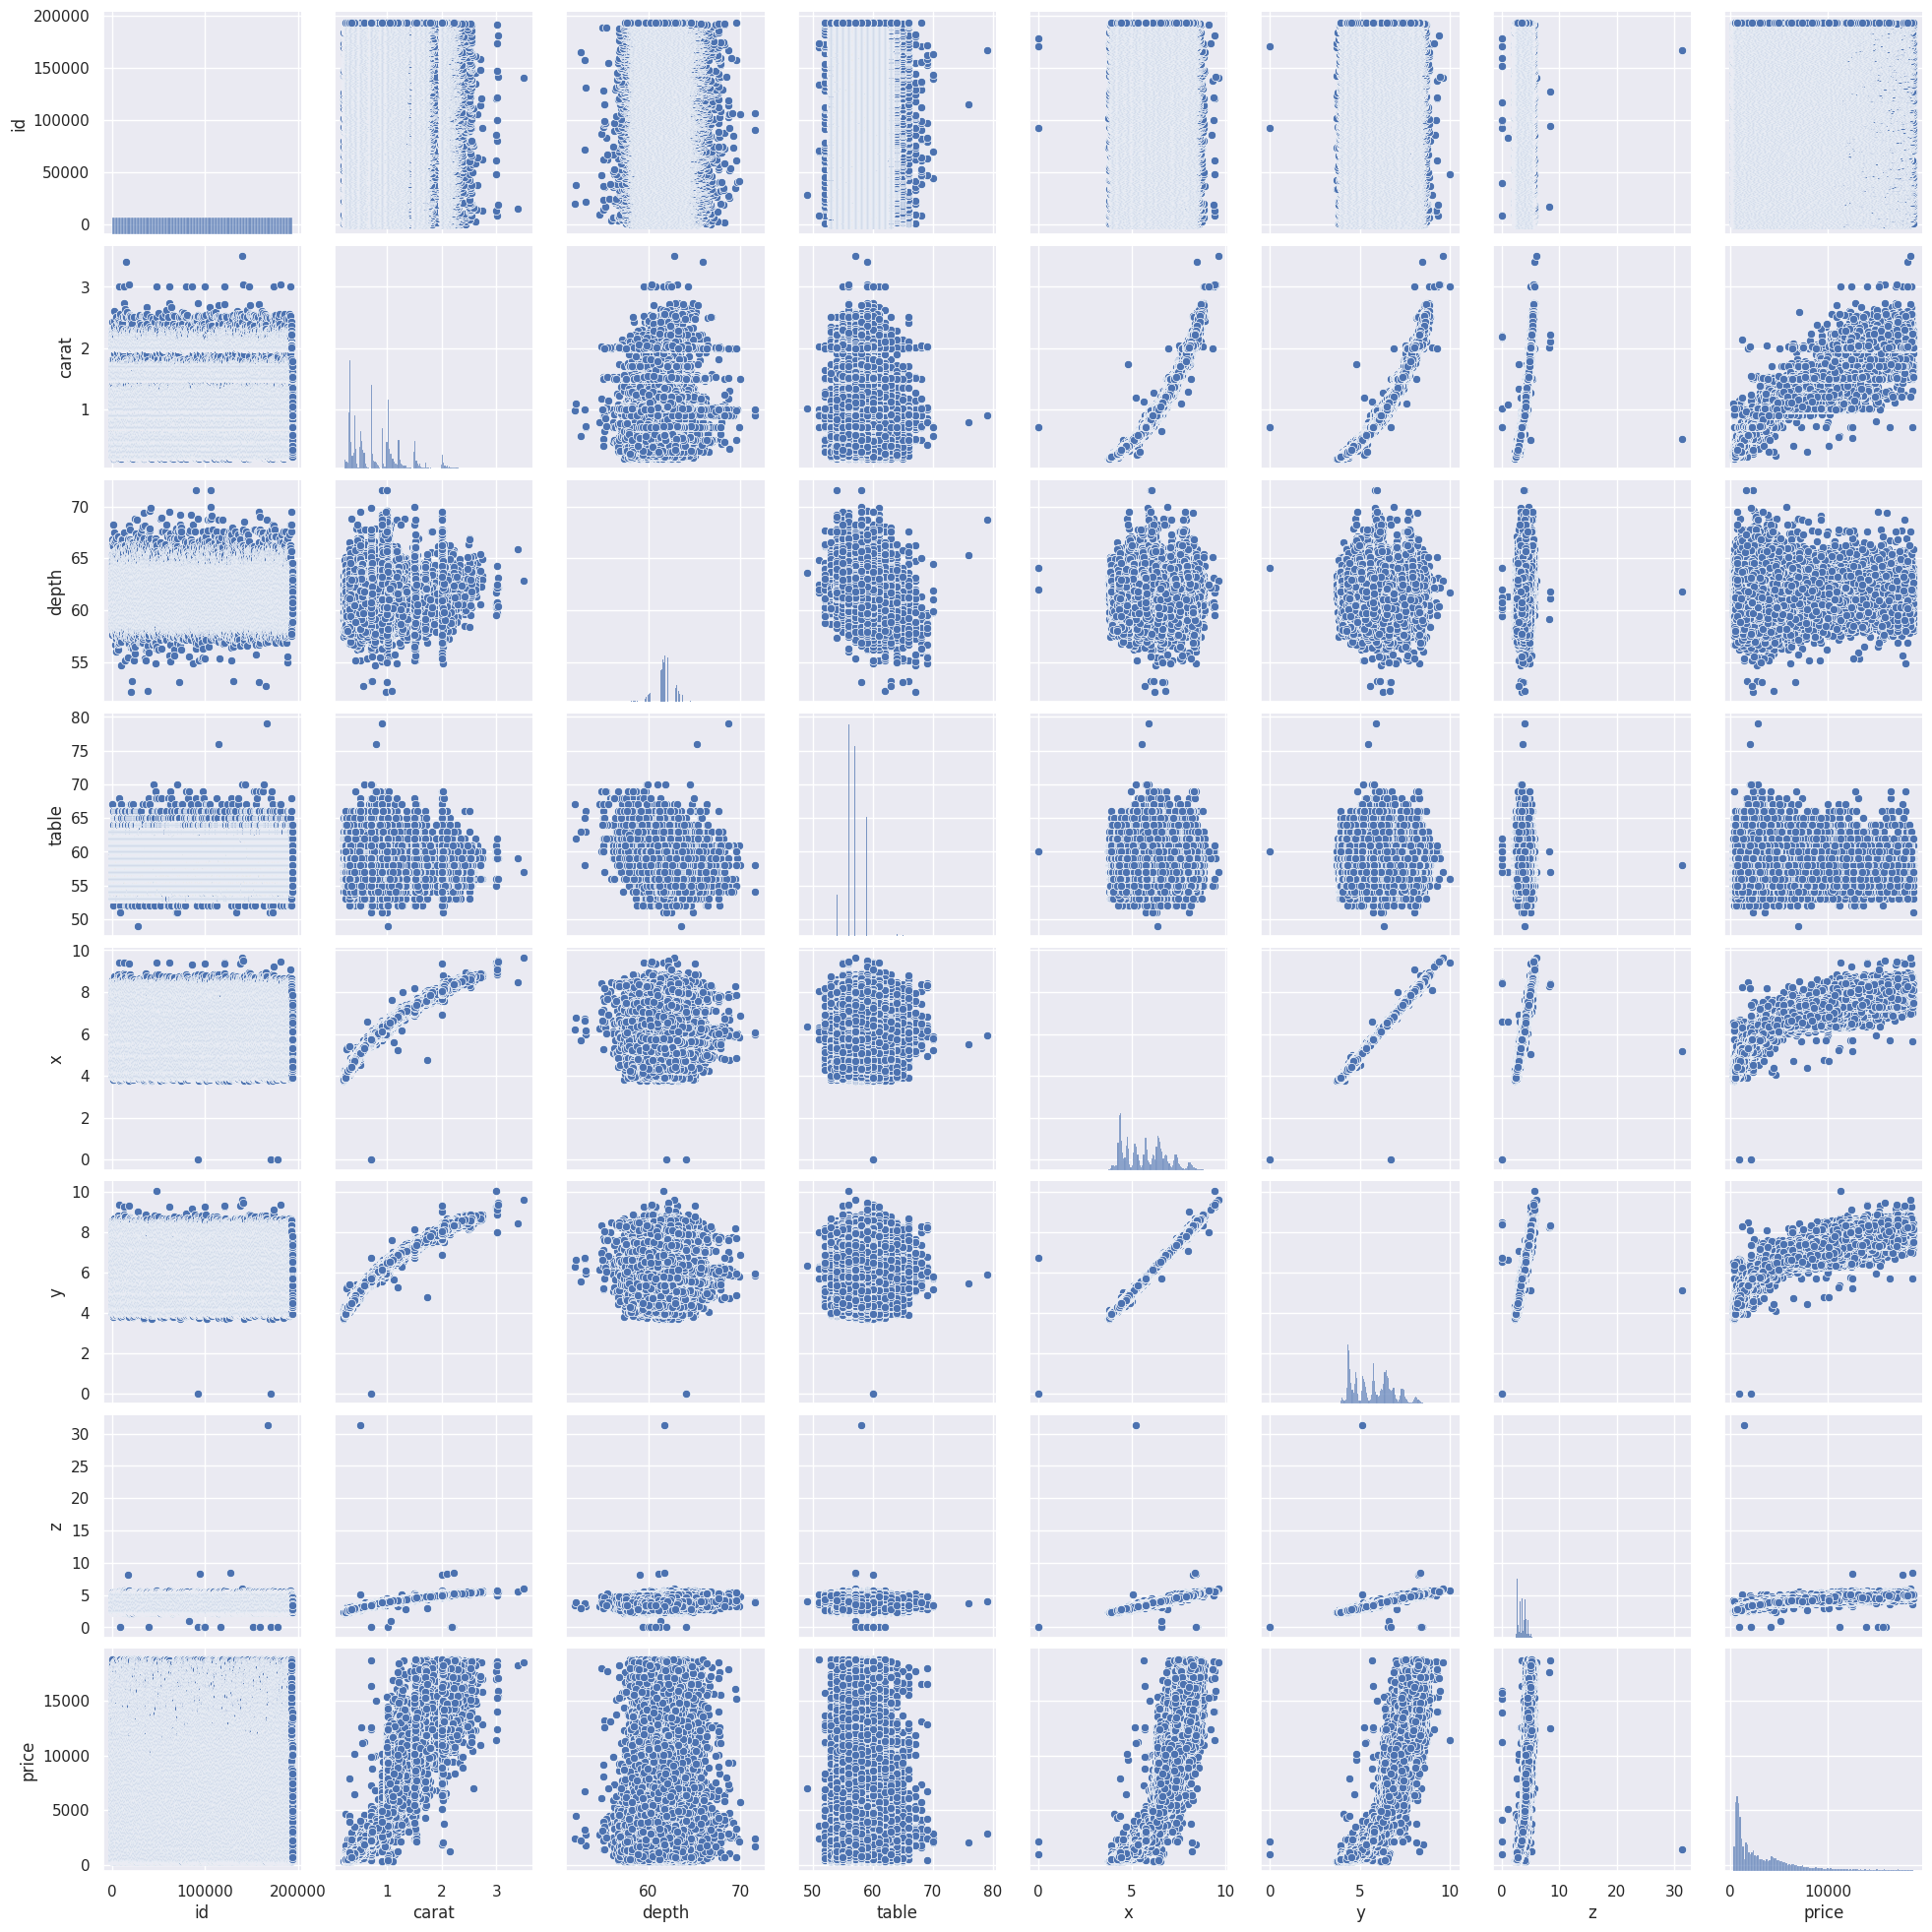

In [134]:
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

<h3 style='color:purple'>(5)Data Cleaning </h3>

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [136]:
num_cols = df.select_dtypes('number')
cat_cols = df.select_dtypes('O')
for c in cat_cols.columns:
    print(cat_cols[c].unique())

['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
['F' 'J' 'G' 'E' 'D' 'H' 'I']
['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


**Here is outliers**

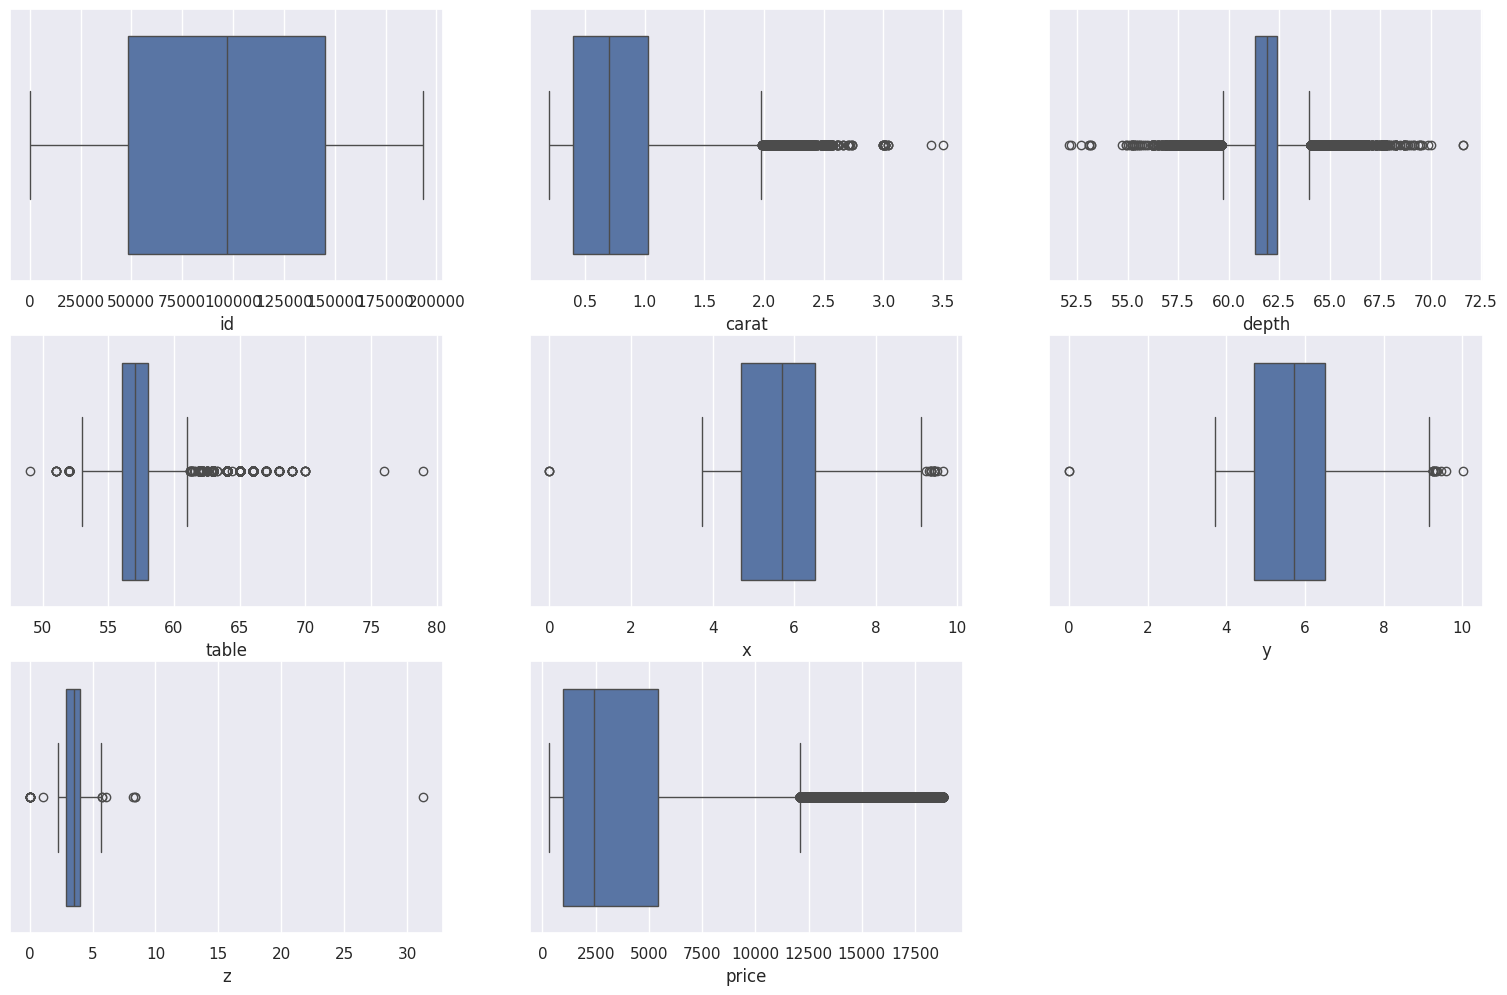

In [137]:
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[c])
    i+=1

**Outlier detection and removal using 3 standard deviation**

In [138]:
def Three_standardDevition(DFcolumns):
    lower_limit=DFcolumns.mean() -3*DFcolumns.std()
    upper_limit=DFcolumns.mean()+ 3*DFcolumns.std()
    return lower_limit,upper_limit

In [139]:
lower_limit,upper_limit=Three_standardDevition(df['x'])
lower_limit,upper_limit=Three_standardDevition(df['y'])
lower_limit,upper_limit=Three_standardDevition(df['z'])

In [140]:
df=df[(df.x>lower_limit) & (df.x<upper_limit)]
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421
11,11,0.23,Ideal,E,VVS2,62.0,57.0,3.96,3.98,2.46,505
13,13,0.31,Ideal,G,VVS1,61.8,56.0,4.37,4.39,2.71,789
...,...,...,...,...,...,...,...,...,...,...,...
193563,193563,0.28,Very Good,E,SI1,61.2,55.0,4.23,4.26,2.60,484
193565,193565,0.31,Premium,D,SI1,62.6,58.0,4.32,4.29,2.69,732
193567,193567,0.58,Ideal,E,VS2,61.8,57.0,5.33,5.36,3.31,1872
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130


In [141]:
df=df[(df.z>lower_limit) & (df.z<upper_limit)]
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421
11,11,0.23,Ideal,E,VVS2,62.0,57.0,3.96,3.98,2.46,505
13,13,0.31,Ideal,G,VVS1,61.8,56.0,4.37,4.39,2.71,789
...,...,...,...,...,...,...,...,...,...,...,...
193563,193563,0.28,Very Good,E,SI1,61.2,55.0,4.23,4.26,2.60,484
193565,193565,0.31,Premium,D,SI1,62.6,58.0,4.32,4.29,2.69,732
193567,193567,0.58,Ideal,E,VS2,61.8,57.0,5.33,5.36,3.31,1872
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130


**Using IQR technique**

In [142]:
def iqr_techniques(DFcolumns):
    Q1=np.percentile(DFcolumns,25)
    Q3=np.percentile(DFcolumns,75)
    IQR=Q3-Q1
    lower_range=Q1 - (1.5*IQR)
    upper_range=Q3 + (1.5*IQR)
    return lower_range,upper_range

In [143]:


lower_bond,upper_bond=iqr_techniques(df['carat'])

In [144]:
df=df[(df.carat>lower_bond) & (df.carat<upper_bond)]
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421
11,11,0.23,Ideal,E,VVS2,62.0,57.0,3.96,3.98,2.46,505
13,13,0.31,Ideal,G,VVS1,61.8,56.0,4.37,4.39,2.71,789
...,...,...,...,...,...,...,...,...,...,...,...
193563,193563,0.28,Very Good,E,SI1,61.2,55.0,4.23,4.26,2.60,484
193565,193565,0.31,Premium,D,SI1,62.6,58.0,4.32,4.29,2.69,732
193567,193567,0.58,Ideal,E,VS2,61.8,57.0,5.33,5.36,3.31,1872
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130


In [145]:

lower_bond,upper_bond=iqr_techniques(df['depth'])

In [42]:
df=df[(df.depth>lower_bond) & (df.depth<upper_bond)]
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421
11,11,0.23,Ideal,E,VVS2,62.0,57.0,3.96,3.98,2.46,505
13,13,0.31,Ideal,G,VVS1,61.8,56.0,4.37,4.39,2.71,789
...,...,...,...,...,...,...,...,...,...,...,...
193563,193563,0.28,Very Good,E,SI1,61.2,55.0,4.23,4.26,2.60,484
193565,193565,0.31,Premium,D,SI1,62.6,58.0,4.32,4.29,2.69,732
193567,193567,0.58,Ideal,E,VS2,61.8,57.0,5.33,5.36,3.31,1872
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130


In [43]:
lower_bond,upper_bond=iqr_techniques(df['table'])

In [44]:
df=df[(df.table>lower_bond) & (df.table<upper_bond)]
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421
11,11,0.23,Ideal,E,VVS2,62.0,57.0,3.96,3.98,2.46,505
13,13,0.31,Ideal,G,VVS1,61.8,56.0,4.37,4.39,2.71,789
...,...,...,...,...,...,...,...,...,...,...,...
193563,193563,0.28,Very Good,E,SI1,61.2,55.0,4.23,4.26,2.60,484
193565,193565,0.31,Premium,D,SI1,62.6,58.0,4.32,4.29,2.69,732
193567,193567,0.58,Ideal,E,VS2,61.8,57.0,5.33,5.36,3.31,1872
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130


In [45]:
lower_bond,upper_bond=iqr_techniques(df['price'])

In [46]:
df=df[(df.price>lower_bond) & (df.price<upper_bond)]
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421
11,11,0.23,Ideal,E,VVS2,62.0,57.0,3.96,3.98,2.46,505
13,13,0.31,Ideal,G,VVS1,61.8,56.0,4.37,4.39,2.71,789
...,...,...,...,...,...,...,...,...,...,...,...
193563,193563,0.28,Very Good,E,SI1,61.2,55.0,4.23,4.26,2.60,484
193565,193565,0.31,Premium,D,SI1,62.6,58.0,4.32,4.29,2.69,732
193567,193567,0.58,Ideal,E,VS2,61.8,57.0,5.33,5.36,3.31,1872
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130


**After removing outliers**

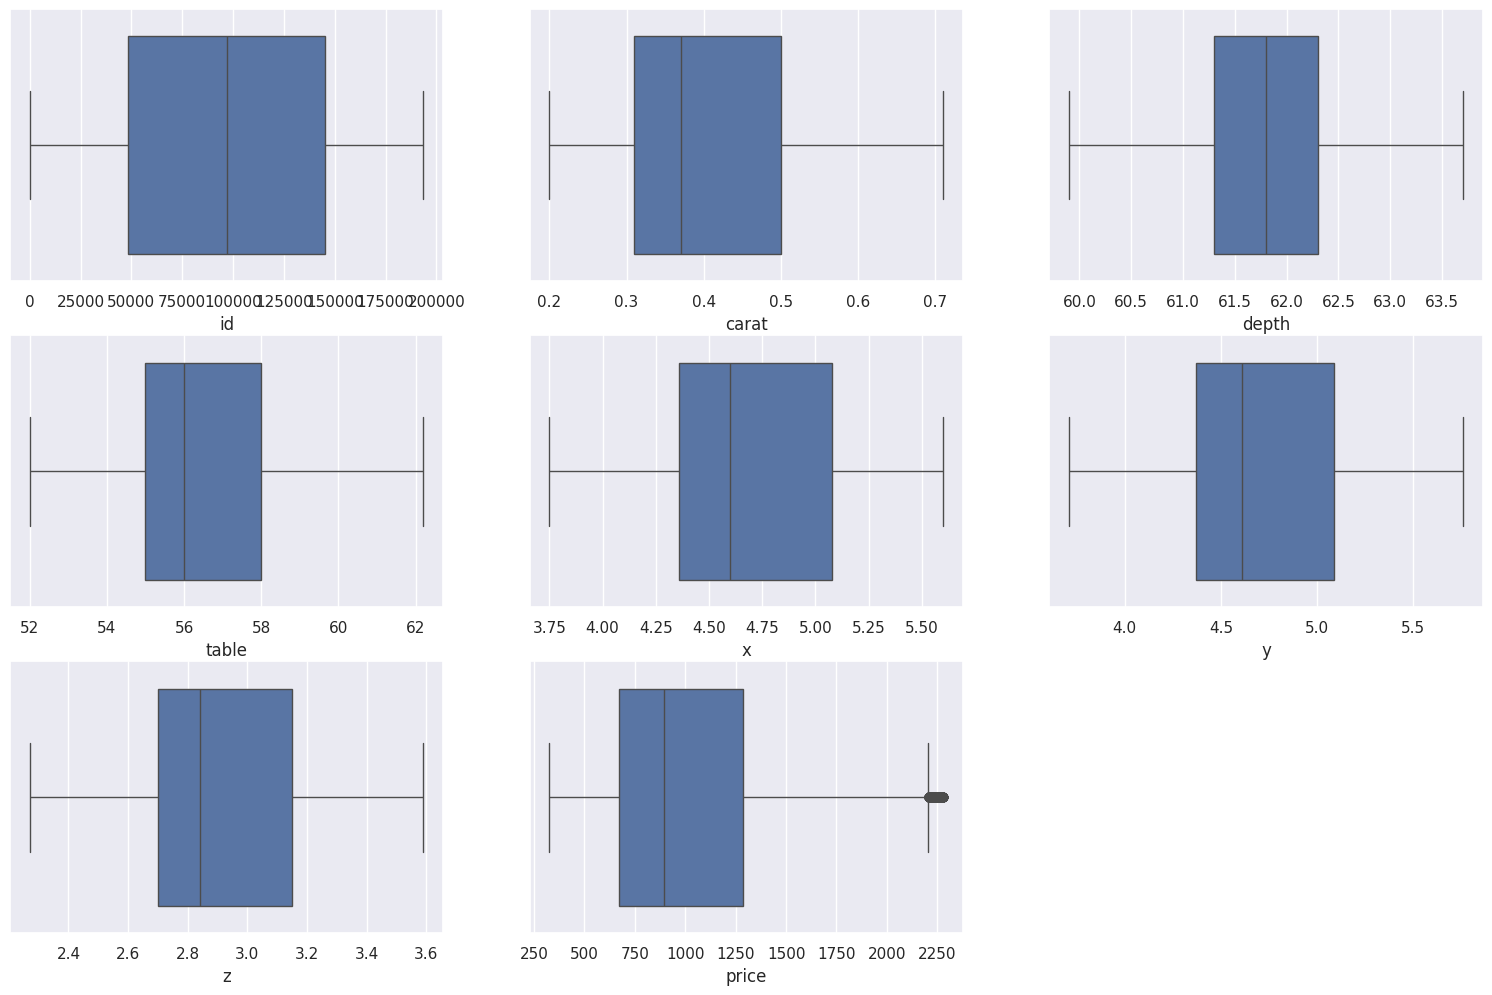

In [47]:
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[c])
    i+=1

<h3 style='color:purple'>(6)Modelling </h3>

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84369 entries, 3 to 193571
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       84369 non-null  int64  
 1   carat    84369 non-null  float64
 2   cut      84369 non-null  object 
 3   color    84369 non-null  object 
 4   clarity  84369 non-null  object 
 5   depth    84369 non-null  float64
 6   table    84369 non-null  float64
 7   x        84369 non-null  float64
 8   y        84369 non-null  float64
 9   z        84369 non-null  float64
 10  price    84369 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 7.7+ MB


In [49]:
df.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886


In [50]:
x=df.drop('price',axis=1)
x.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70


In [51]:
y=df.price
y.head()

,price
3,666
8,886
9,421
11,505
13,789


In [52]:
le_data=LabelEncoder()
cut_l=le_data.fit_transform(x['cut'])
color_l=le_data.fit_transform(x['color'])
clarity_l=le_data.fit_transform(x['clarity'])
x['cut']=cut_l
x['color']=color_l
x['clarity']=clarity_l

In [53]:
x.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
3,3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71
8,8,0.30,2,2,1,62.0,56.0,4.35,4.37,2.70
9,9,0.30,1,6,4,63.6,57.0,4.26,4.28,2.72
11,11,0.23,2,1,7,62.0,57.0,3.96,3.98,2.46
13,13,0.31,2,3,6,61.8,56.0,4.37,4.39,2.71


In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

In [55]:
model=linear_model.LinearRegression()

In [56]:
model.fit(xtrain,ytrain)

LinearRegression()

In [57]:

y_pred=model.predict(xtest)

In [58]:
y_truth=ytest

In [59]:
model.score(xtest,ytest)

0.8365608437711032

In [60]:
model1=tree.DecisionTreeRegressor()

In [61]:
model1.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [62]:
y_pred1=model1.predict(xtest)

In [63]:
y_truth1=ytest

In [64]:
model1.score(xtest,ytest)

0.9004252843776052

<h3 style='color:purple'>(7)Accuracy Check</h3>

**Mean Absolute Error**

In [65]:
from sklearn.metrics import mean_absolute_error

In [66]:
MAE_l=mean_absolute_error(y_truth,y_pred)
print("The mean absolute error of Linear Regression model is {}".format(round(MAE_l,2)))

The mean absolute error of Linear Regression model is 138.16


In [67]:
MAE_d=mean_absolute_error(y_truth1,y_pred1)
print("The mean absolute error of  Decision Tree Regressor model is {}".format(round(MAE_d,2)))

The mean absolute error of  Decision Tree Regressor model is 102.7


**Mean Squared Error**

In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
MSE_l=mean_squared_error(y_truth,y_pred,squared=False)
print("The mean absolute error of Linear Regression model is {}".format(round(MSE_l,2)))

The mean absolute error of Linear Regression model is 182.62


In [70]:
MSE_d=mean_squared_error(y_truth1,y_pred1,squared=False)
print("The mean absolute error of Decision Tree Regressor model is {}".format(round(MSE_d,2)))

The mean absolute error of Decision Tree Regressor model is 142.54


**Root Mean Square Error**

In [71]:

RMSE_l=np.sqrt(mean_absolute_error(y_truth,y_pred))
print("The root mean square error of  Linear Regression model is {}".format(round(RMSE_l,2)))

The root mean square error of  Linear Regression model is 11.75


In [72]:
RMSE_d=np.sqrt(mean_absolute_error(y_truth1,y_pred1))
print("The root mean square error of Decision Tree Regressor model is {}".format(round(RMSE_d,2)))

The root mean square error of Decision Tree Regressor model is 10.13


**R2 score**

In [73]:
from sklearn.metrics import r2_score

In [74]:
r2_linear=r2_score(y_truth,y_pred)
print("The accuracy of  Linear Regression model is {}%".format(round(r2_linear,2)*100))

The accuracy of  Linear Regression model is 84.0%


In [75]:

r2_decision=r2_score(y_truth1,y_pred1)
print("The accuracy of Decision Tree Regressor model is {}%".format(round(r2_decision,2)*100))

The accuracy of Decision Tree Regressor model is 90.0%


**Adjusted R2 score**

In [76]:
xtest.shape

(16874, 10)

In [77]:
Adjusted_r2_linear=1-((1-r2_linear)*(16874-1)/(16874-1-10))
print("Adjusted_r2_linear=",Adjusted_r2_linear)

Adjusted_r2_linear= 0.8364639220156451


In [78]:
Adjusted_r2_decision=1-((1-r2_decision)*(16871-1)/(16874-1-10))
print("Adjusted_r2_decision=",Adjusted_r2_decision)

Adjusted_r2_decision= 0.9003839499169898


<h3 style='color:purple'>(7)Hyperparameter Tuning</h3>

In [79]:
models={
    'linear_regression':{
        'model':LinearRegression(),
        'params':{
            'fit_intercept':[True, False],
            'n_jobs':[12]
        }
    },
    'random_forest':{
        'model':RandomForestRegressor(),
        'params': {
            'n_estimators': randint(10,100),
            'max_depth': [None, 10, 20],
            'min_samples_split': randint(2, 11),
            'min_samples_leaf': randint(1, 5)
        }
    }
}

In [80]:
scores=[]
for model_name in models:
    mp=models[model_name]
    gds=RandomizedSearchCV(mp['model'],mp['params'],cv=2,return_train_score=True)
    gds.fit(xtrain,ytrain)
    scores.append({'model':model_name,'best_score':gds.best_score_,
                  'best_params':gds.best_params_})


In [81]:
newmodel=pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [82]:
df2=newmodel.to_excel('new_excel.xlsx')

In [83]:
df2

In [84]:
newmodel

,model,best_score,best_params
0,linear_regression,0.837615,"{'n_jobs': 12, 'fit_intercept': True}"
1,random_forest,0.947872,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."


In [85]:
model=RandomForestRegressor({'max_depth':20,
            'min_samples_split': 3,
            'min_samples_leaf': 8,
            'n_estimators': 47})

In [86]:
df.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886


In [87]:
# Identify features and target
X = df.drop(columns=['price','id'])
y = df['price']

In [88]:
# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [89]:


# Preprocessing for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [90]:
model_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(max_depth=20,
                                   min_samples_split= 2,min_samples_leaf= 10,n_estimators= 47))
])

In [91]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=7,
                                       min_samples_split=4, n_estimators=95))])

In [93]:
joblib.dump(model_pipeline,'model_pipeline.joblib')

['model_pipeline.joblib']

In [94]:
loaded_pipeline=joblib.load('model_pipeline.joblib')

In [95]:
pwd

'/content'

In [96]:
print(type(loaded_pipeline))

<class 'sklearn.pipeline.Pipeline'>


In [97]:
print(loaded_pipeline.named_steps.keys())

dict_keys(['preprocessor', 'model'])


In [98]:
# Prepare example data
feature = pd.DataFrame({
    'carat': [0.3],
    'cut': ['Good'],
    'color': ['G'],
    'clarity': ['VS2'],
    'depth': [61.5],
    'table': [57.0],
    'x': [4.0],
    'y': [4.0],
    'z': [2.5]
})

In [99]:
prediction = loaded_pipeline.predict(feature)

In [100]:
prediction

array([521.32806874])

In [102]:
preprocessor = loaded_pipeline.named_steps['model']
print(preprocessor)

RandomForestRegressor(max_depth=20, min_samples_leaf=7, min_samples_split=4,
                      n_estimators=95)


In [103]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421
11,11,0.23,Ideal,E,VVS2,62.0,57.0,3.96,3.98,2.46,505
13,13,0.31,Ideal,G,VVS1,61.8,56.0,4.37,4.39,2.71,789
...,...,...,...,...,...,...,...,...,...,...,...
193563,193563,0.28,Very Good,E,SI1,61.2,55.0,4.23,4.26,2.60,484
193565,193565,0.31,Premium,D,SI1,62.6,58.0,4.32,4.29,2.69,732
193567,193567,0.58,Ideal,E,VS2,61.8,57.0,5.33,5.36,3.31,1872
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130


In [104]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/cleaned.csv")